<a href="https://colab.research.google.com/github/parveen180/Machine-learning-project-python/blob/main/DogV_SCat_classification_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

 98% 792M/812M [00:04<00:00, 94.7MB/s]
100% 812M/812M [00:04<00:00, 205MB/s] 


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
#extracting the compressed file(dataset)
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
from zipfile import ZipFile
dataset='/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The train dataset is extracted')

The train dataset is extracted


In [7]:
import os
#counting no of files in train folder
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print(file_count)
print('Number of images: ', file_count)

25000
Number of images:  25000


printing the name of the images

In [8]:
file_names=os.listdir('/content/train')
print(file_names)

['dog.7357.jpg', 'cat.9358.jpg', 'dog.2181.jpg', 'cat.7866.jpg', 'dog.4580.jpg', 'cat.9431.jpg', 'cat.11565.jpg', 'dog.12130.jpg', 'dog.2840.jpg', 'dog.10848.jpg', 'cat.4764.jpg', 'dog.2854.jpg', 'cat.2343.jpg', 'cat.1000.jpg', 'dog.6084.jpg', 'cat.11109.jpg', 'cat.8153.jpg', 'dog.3962.jpg', 'cat.6891.jpg', 'cat.9220.jpg', 'cat.10337.jpg', 'cat.238.jpg', 'cat.4380.jpg', 'cat.327.jpg', 'cat.5890.jpg', 'cat.6384.jpg', 'dog.4306.jpg', 'dog.10121.jpg', 'cat.172.jpg', 'dog.728.jpg', 'dog.8990.jpg', 'dog.7242.jpg', 'dog.3251.jpg', 'cat.10370.jpg', 'cat.7709.jpg', 'dog.4523.jpg', 'cat.923.jpg', 'dog.12200.jpg', 'cat.5539.jpg', 'cat.5928.jpg', 'cat.6700.jpg', 'dog.9228.jpg', 'dog.1223.jpg', 'cat.1066.jpg', 'cat.6271.jpg', 'dog.8955.jpg', 'dog.2508.jpg', 'cat.12247.jpg', 'dog.9300.jpg', 'dog.1201.jpg', 'cat.9592.jpg', 'dog.2076.jpg', 'dog.6738.jpg', 'cat.2614.jpg', 'dog.11759.jpg', 'dog.4389.jpg', 'dog.8354.jpg', 'dog.702.jpg', 'dog.2597.jpg', 'cat.4243.jpg', 'dog.10451.jpg', 'dog.12299.jpg', '

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

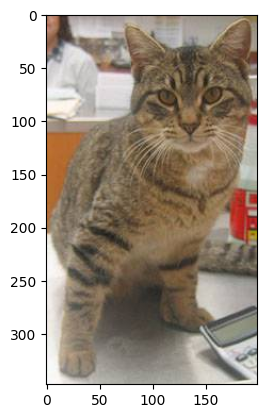

In [10]:
#displaying the image
img=mpimg.imread('/content/train/cat.7866.jpg')
imgplot=plt.imshow(img)
plt.show()

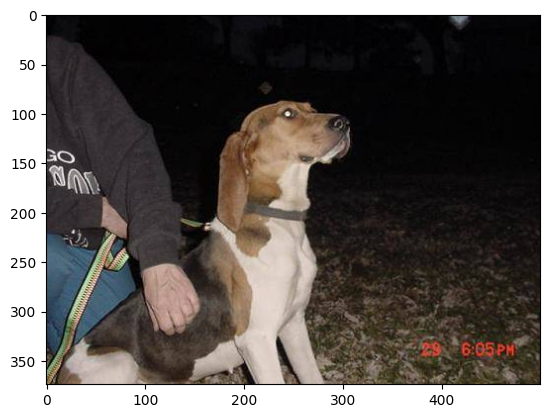

In [11]:
#displaying the image
img=mpimg.imread('/content/train/dog.2181.jpg')
imgplot=plt.imshow(img)
plt.show()

In [12]:
file_names=os.listdir('/content/train')

for i in range(5):
    name=file_names[i]
    print(name[0:3])

dog
cat
dog
cat
dog


In [13]:
file_names=os.listdir('/content/train')
dog_count=0
cat_count=0

for j in file_names:
    name=j[0:3]

    if name =='dog':

        dog_count+=1
    else:
        cat_count+=1

print('Number of dogs: ', dog_count)
print('Number of cats: ', cat_count)


Number of dogs:  12500
Number of cats:  12500


In [14]:
#creating a directory for resized images
os.mkdir('/content/resized_images')

In [15]:
original_folder='/content/train/'
resized_folder='/content/resized_images/'

for i in range(2000):

    filename=os.listdir(original_folder)[i]

    img_path=original_folder+filename

    img=Image.open(img_path)
    img=img.resize((224,224))
    img=img.convert('RGB')

    newImgPath=resized_folder+filename

    img.save(newImgPath)


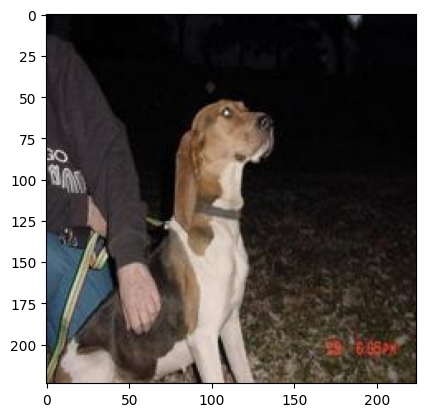

In [16]:
#display resized dog image
img=mpimg.imread('/content/resized_images/dog.2181.jpg')
imgplot=plt.imshow(img)
plt.show()

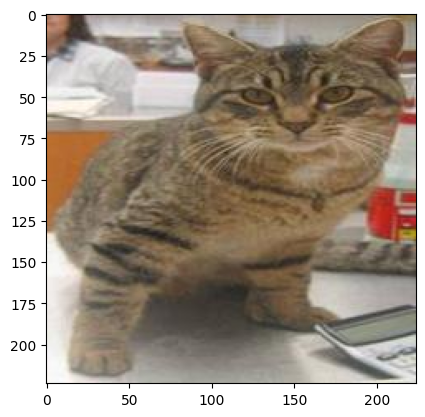

In [17]:
#display resized dog image
img=mpimg.imread('/content/resized_images/cat.7866.jpg')
imgplot=plt.imshow(img)
plt.show()

In [18]:
#creating labels for resized images of dogs and cats
#cat -->0
#dog  -->1
filenames=os.listdir('/content/resized_images/')

labels=[]


for filename in filenames:
    label=filename[0:3]

    if label =='dog':
        labels.append(1)
    else:
        labels.append(0)

In [19]:
print(filenames[0:5])
print(len(filenames))

['dog.7357.jpg', 'cat.9358.jpg', 'dog.2181.jpg', 'cat.7866.jpg', 'dog.4580.jpg']
2000


In [20]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 1]
2000


In [21]:
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 953 1047]


#converting resized images to numpy array

In [22]:
import cv2
import glob

In [23]:
image_directory = '/content/resized_images/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [24]:
print(dog_cat_images)

[[[[ 82 114  95]
   [ 89 115  97]
   [110 126 108]
   ...
   [ 52 120 103]
   [ 51 119 102]
   [ 38 106  89]]

  [[ 78 110  91]
   [ 84 112  93]
   [106 122 105]
   ...
   [ 50 118 101]
   [ 50 118 101]
   [ 40 108  91]]

  [[ 73 107  90]
   [ 77 107  88]
   [101 119 102]
   ...
   [ 51 119 102]
   [ 52 120 103]
   [ 44 112  95]]

  ...

  [[ 41  94  80]
   [ 38  93  78]
   [ 43  98  83]
   ...
   [ 42 109 102]
   [ 47 114 107]
   [ 42 109 102]]

  [[ 34  86  69]
   [ 32  86  69]
   [ 40  94  77]
   ...
   [ 44 110 105]
   [ 50 116 111]
   [ 46 112 107]]

  [[ 31  83  65]
   [ 31  83  65]
   [ 37  91  74]
   ...
   [ 45 110 108]
   [ 51 116 114]
   [ 47 112 110]]]


 [[[106 130 136]
   [104 128 134]
   [102 126 132]
   ...
   [ 13  12  14]
   [ 13  12  14]
   [ 13  12  14]]

  [[107 131 137]
   [106 130 136]
   [103 127 133]
   ...
   [ 13  12  14]
   [ 13  12  14]
   [ 13  12  14]]

  [[109 133 139]
   [108 132 138]
   [105 129 135]
   ...
   [ 13  12  14]
   [ 13  12  14]
   [ 13  12

In [25]:
x=dog_cat_images
y=np.asarray(labels)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [28]:
print(x_train_scaled)

[[[[0.55294118 0.65098039 0.63529412]
   [0.52156863 0.62745098 0.61176471]
   [0.47058824 0.59607843 0.57647059]
   ...
   [0.63137255 0.76470588 0.72156863]
   [0.64313725 0.74117647 0.70196078]
   [0.62745098 0.72156863 0.68235294]]

  [[0.56862745 0.66666667 0.65098039]
   [0.52156863 0.62745098 0.61176471]
   [0.47843137 0.60392157 0.58431373]
   ...
   [0.70588235 0.83921569 0.79607843]
   [0.68235294 0.78823529 0.74901961]
   [0.65882353 0.75686275 0.71764706]]

  [[0.59215686 0.70196078 0.67843137]
   [0.56078431 0.68235294 0.65490196]
   [0.55686275 0.69019608 0.6627451 ]
   ...
   [0.69803922 0.83137255 0.78823529]
   [0.67843137 0.79607843 0.75294118]
   [0.68235294 0.78823529 0.74901961]]

  ...

  [[0.32941176 0.44313725 0.49803922]
   [0.32941176 0.44705882 0.49019608]
   [0.38039216 0.50196078 0.5372549 ]
   ...
   [0.40392157 0.5254902  0.5372549 ]
   [0.41568627 0.5372549  0.54901961]
   [0.24705882 0.36862745 0.38039216]]

  [[0.38431373 0.48627451 0.54901961]
   [0.3

Building neural networks

In [29]:
import tensorflow as tf
import tensorflow_hub as hub

In [30]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [31]:
!pip install tf_keras

In [32]:
import tf_keras

In [33]:
num_of_classes = 2

model = tf_keras.Sequential([

    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [34]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [35]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 68s 1s/step - loss: 0.1908 - acc: 0.9287
Epoch 2/5
50/50 [==============================] - 64s 1s/step - loss: 0.0611 - acc: 0.9812
Epoch 3/5
50/50 [==============================] - 58s 1s/step - loss: 0.0436 - acc: 0.9856
Epoch 4/5
50/50 [==============================] - 50s 1s/step - loss: 0.0343 - acc: 0.9919
Epoch 5/5
50/50 [==============================] - 58s 1s/step - loss: 0.0268 - acc: 0.9937


In [36]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 28s 2s/step - loss: 0.0453 - acc: 0.9825
Test Loss = 0.04527982324361801
Test Accuracy = 0.9825000166893005


Enter the image path: /content/dog.jpeg


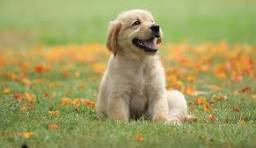

1/1 [==============================] - 0s 50ms/step
[[-3.0879061  4.6231785]]
1
The image is a dog


In [40]:
input_image_path=input('Enter the image path: ')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(224,224))

input_image_scaled=input_image_resize/255

image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])

input_prediction=model.predict(image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==0:
    print('The image is a cat')
else:
    print('The image is a dog')